# Pog 4 - A Stack of Stacks (of Stacks?)

## Data Creation

In [1]:
import pandas as pd
import numpy as np

from data import POG4_Dataset

In [2]:
data = POG4_Dataset()

INFO - Creating XML data
INFO - Creating activity data
INFO - Missing days: 16
INFO - Featurizing time series data
INFO - Creating interactions...
INFO - Dropped null columns: ['WalkingSpeed_nhours_min_min', 'WalkingSpeed_nhours_min_max', 'WalkingSpeed_nhours_max_min', 'WalkingSpeed_nhours_max_max', 'WalkingSpeed_min_endDate_hr', 'WalkingSpeed_max_endDate_hr', 'RunningSpeed', 'RunningSpeed_max_hrs_between', 'RunningSpeed_sum_hrs_between', 'RunningSpeed_nhours_min_min', 'RunningSpeed_nhours_min_max', 'RunningSpeed_nhours_max_min', 'RunningSpeed_nhours_max_max', 'RunningSpeed_min_endDate_hr', 'RunningSpeed_max_endDate_hr', 'RunningSpeed_min_startDate_hr', 'RunningSpeed_max_startDate_hr', 'AppleWalkingSteadiness', 'AppleWalkingSteadiness_max_hrs_between', 'AppleWalkingSteadiness_sum_hrs_between', 'AppleWalkingSteadiness_nhours_min_min', 'AppleWalkingSteadiness_nhours_min_max', 'AppleWalkingSteadiness_nhours_max_min', 'AppleWalkingSteadiness_nhours_max_max', 'AppleWalkingSteadiness_min_end

In [3]:
data.train.head()

,date,sleep_hours,is_workday,AppleStandTime_max_hrs_between,AppleStandTime_max_endDate_hr,FlightsClimbed_max_endDate_hr,AppleExerciseTime_max_hrs_between,min_endDate_max_hr,AppleStandTime_nhours_max_max,FlightsClimbed_min_endDate_hr,...,WalkingStepLength_min_startDate_hr,OxygenSaturation_min_startDate_hr,max_endDate_min_hr,WalkingStepLength_max_startDate_hr,workout_totalEnergyBurnedUnit,AppleStandHour_nhours_max_min,AppleStandHour_nhours_max_max,workout_totalEnergyBurned,is_weekend,AppleStandHour_min_endDate_hr
0,2020-06-01,7.433333,1,NaN,NaN,23.0,NaN,23.0,NaN,23.0,...,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2020-06-02,6.833333,1,NaN,NaN,23.0,NaN,23.0,NaN,22.0,...,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2020-06-03,6.116667,1,NaN,NaN,23.0,NaN,23.0,NaN,23.0,...,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,0,NaN
3,2020-06-04,7.333333,1,NaN,NaN,23.0,NaN,23.0,NaN,23.0,...,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,0,NaN
4,2020-06-05,6.983333,1,NaN,NaN,23.0,NaN,23.0,NaN,23.0,...,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,0,NaN


## Simple Models - Variance Control

In [4]:
class SuperSimpleModel:
    def __init__(self, value):
        self.value = value
        
    def predict(self, X):
        return np.ones(len(X)) * self.value

In [5]:
median = data.train["sleep_hours"].median()
print(f"Median sleep hours: {median}")

sub_median = data.create_submission(SuperSimpleModel(median))
sub_median.to_csv("./submissions/sub_median.csv", index=False)
sub_median.head()

INFO - Creating submission dataset
INFO - Featurizing time series data
INFO - Creating interactions...


Median sleep hours: 6.775
Index(['date', 'sleep_hours', 'is_workday', 'AppleStandTime_max_hrs_between',
       'AppleStandTime_max_endDate_hr', 'FlightsClimbed_max_endDate_hr',
       'AppleExerciseTime_max_hrs_between', 'min_endDate_max_hr',
       'AppleStandTime_nhours_max_max', 'FlightsClimbed_min_endDate_hr',
       ...
       'WalkingStepLength_min_startDate_hr',
       'OxygenSaturation_min_startDate_hr', 'max_endDate_min_hr',
       'WalkingStepLength_max_startDate_hr', 'workout_totalEnergyBurnedUnit',
       'AppleStandHour_nhours_max_min', 'AppleStandHour_nhours_max_max',
       'workout_totalEnergyBurned', 'is_weekend',
       'AppleStandHour_min_endDate_hr'],
      dtype='object', length=163)


,date,sleep_hours
0,2022-01-01,6.775
1,2022-01-02,6.775
2,2022-01-03,6.775
3,2022-01-04,6.775
4,2022-01-05,6.775


In [6]:
mean = data.train["sleep_hours"].mean()
print(f"Mean sleep hours: {mean}")

sub_mean = data.create_submission(SuperSimpleModel(mean))
sub_mean.to_csv("./submissions/sub_mean.csv", index=False)
sub_mean.head()

INFO - Creating submission dataset
INFO - Featurizing time series data
INFO - Creating interactions...


Mean sleep hours: 6.78204558910598
Index(['date', 'sleep_hours', 'is_workday', 'AppleStandTime_max_hrs_between',
       'AppleStandTime_max_endDate_hr', 'FlightsClimbed_max_endDate_hr',
       'AppleExerciseTime_max_hrs_between', 'min_endDate_max_hr',
       'AppleStandTime_nhours_max_max', 'FlightsClimbed_min_endDate_hr',
       ...
       'WalkingStepLength_min_startDate_hr',
       'OxygenSaturation_min_startDate_hr', 'max_endDate_min_hr',
       'WalkingStepLength_max_startDate_hr', 'workout_totalEnergyBurnedUnit',
       'AppleStandHour_nhours_max_min', 'AppleStandHour_nhours_max_max',
       'workout_totalEnergyBurned', 'is_weekend',
       'AppleStandHour_min_endDate_hr'],
      dtype='object', length=163)


,date,sleep_hours
0,2022-01-01,6.782046
1,2022-01-02,6.782046
2,2022-01-03,6.782046
3,2022-01-04,6.782046
4,2022-01-05,6.782046


In [7]:
class SimpleModel:
    def __init__(self, value_group, group):
        self.value_group = value_group
        self.group = group
        
    def predict(self, X):
        return X[self.group].map(self.value_group)

In [8]:
median_dow = data.train.groupby("day_of_week")["sleep_hours"].median()
print(median_dow)

sub_median_dow = data.create_submission(SimpleModel(median_dow, "day_of_week"))
sub_median_dow.to_csv("./submissions/sub_median_dow.csv", index=False)
sub_median_dow.head()

INFO - Creating submission dataset
INFO - Featurizing time series data
INFO - Creating interactions...


day_of_week
0    6.725000
1    6.516667
2    6.683333
3    6.779167
4    6.966667
5    6.966667
6    6.775000
Name: sleep_hours, dtype: float64
Index(['date', 'sleep_hours', 'is_workday', 'AppleStandTime_max_hrs_between',
       'AppleStandTime_max_endDate_hr', 'FlightsClimbed_max_endDate_hr',
       'AppleExerciseTime_max_hrs_between', 'min_endDate_max_hr',
       'AppleStandTime_nhours_max_max', 'FlightsClimbed_min_endDate_hr',
       ...
       'WalkingStepLength_min_startDate_hr',
       'OxygenSaturation_min_startDate_hr', 'max_endDate_min_hr',
       'WalkingStepLength_max_startDate_hr', 'workout_totalEnergyBurnedUnit',
       'AppleStandHour_nhours_max_min', 'AppleStandHour_nhours_max_max',
       'workout_totalEnergyBurned', 'is_weekend',
       'AppleStandHour_min_endDate_hr'],
      dtype='object', length=163)


,date,sleep_hours
0,2022-01-01,6.966667
1,2022-01-02,6.775000
2,2022-01-03,6.725000
3,2022-01-04,6.516667
4,2022-01-05,6.683333


In [9]:
mean_dow = data.train.groupby("day_of_week")["sleep_hours"].mean()
print(mean_dow)

sub_mean_dow = data.create_submission(SimpleModel(mean_dow, "day_of_week"))
sub_mean_dow.to_csv("./submissions/sub_mean_dow.csv", index=False)
sub_mean_dow.head()

INFO - Creating submission dataset
INFO - Featurizing time series data
INFO - Creating interactions...


day_of_week
0    6.745988
1    6.533854
2    6.732927
3    6.785729
4    6.827637
5    7.029370
6    6.815295
Name: sleep_hours, dtype: float64
Index(['date', 'sleep_hours', 'is_workday', 'AppleStandTime_max_hrs_between',
       'AppleStandTime_max_endDate_hr', 'FlightsClimbed_max_endDate_hr',
       'AppleExerciseTime_max_hrs_between', 'min_endDate_max_hr',
       'AppleStandTime_nhours_max_max', 'FlightsClimbed_min_endDate_hr',
       ...
       'WalkingStepLength_min_startDate_hr',
       'OxygenSaturation_min_startDate_hr', 'max_endDate_min_hr',
       'WalkingStepLength_max_startDate_hr', 'workout_totalEnergyBurnedUnit',
       'AppleStandHour_nhours_max_min', 'AppleStandHour_nhours_max_max',
       'workout_totalEnergyBurned', 'is_weekend',
       'AppleStandHour_min_endDate_hr'],
      dtype='object', length=163)


,date,sleep_hours
0,2022-01-01,7.029370
1,2022-01-02,6.815295
2,2022-01-03,6.745988
3,2022-01-04,6.533854
4,2022-01-05,6.732927


In [10]:
median_workday = data.train.groupby("is_workday")["sleep_hours"].median()
print(median_workday)

sub_median_workday = data.create_submission(SimpleModel(median_workday, "is_workday"))
sub_median_workday.to_csv("./submissions/sub_median_workday.csv", index=False)
sub_median_workday.head()

INFO - Creating submission dataset
INFO - Featurizing time series data
INFO - Creating interactions...


is_workday
0    6.875000
1    6.745833
Name: sleep_hours, dtype: float64
Index(['date', 'sleep_hours', 'is_workday', 'AppleStandTime_max_hrs_between',
       'AppleStandTime_max_endDate_hr', 'FlightsClimbed_max_endDate_hr',
       'AppleExerciseTime_max_hrs_between', 'min_endDate_max_hr',
       'AppleStandTime_nhours_max_max', 'FlightsClimbed_min_endDate_hr',
       ...
       'WalkingStepLength_min_startDate_hr',
       'OxygenSaturation_min_startDate_hr', 'max_endDate_min_hr',
       'WalkingStepLength_max_startDate_hr', 'workout_totalEnergyBurnedUnit',
       'AppleStandHour_nhours_max_min', 'AppleStandHour_nhours_max_max',
       'workout_totalEnergyBurned', 'is_weekend',
       'AppleStandHour_min_endDate_hr'],
      dtype='object', length=163)


,date,sleep_hours
0,2022-01-01,6.875000
1,2022-01-02,6.875000
2,2022-01-03,6.745833
3,2022-01-04,6.745833
4,2022-01-05,6.745833


In [11]:
mean_workday = data.train.groupby("is_workday")["sleep_hours"].mean()
print(mean_workday)

sub_mean_workday = data.create_submission(SimpleModel(mean_workday, "is_workday"))
sub_mean_workday.to_csv("./submissions/sub_mean_workday.csv", index=False)
sub_mean_workday.head()

INFO - Creating submission dataset
INFO - Featurizing time series data


is_workday
0    6.924327
1    6.725062
Name: sleep_hours, dtype: float64


INFO - Creating interactions...


Index(['date', 'sleep_hours', 'is_workday', 'AppleStandTime_max_hrs_between',
       'AppleStandTime_max_endDate_hr', 'FlightsClimbed_max_endDate_hr',
       'AppleExerciseTime_max_hrs_between', 'min_endDate_max_hr',
       'AppleStandTime_nhours_max_max', 'FlightsClimbed_min_endDate_hr',
       ...
       'WalkingStepLength_min_startDate_hr',
       'OxygenSaturation_min_startDate_hr', 'max_endDate_min_hr',
       'WalkingStepLength_max_startDate_hr', 'workout_totalEnergyBurnedUnit',
       'AppleStandHour_nhours_max_min', 'AppleStandHour_nhours_max_max',
       'workout_totalEnergyBurned', 'is_weekend',
       'AppleStandHour_min_endDate_hr'],
      dtype='object', length=163)


,date,sleep_hours
0,2022-01-01,6.924327
1,2022-01-02,6.924327
2,2022-01-03,6.725062
3,2022-01-04,6.725062
4,2022-01-05,6.725062


In [12]:
class DoubleGroupModel:
    def __init__(self, value_group, group):
        self.value_group = value_group
        self.group = group
        
    def predict(self, X):
        return X[self.group].apply(lambda x: self.value_group[tuple(x)], axis=1)

In [13]:
median_dow_workday = data.train.groupby(["day_of_week", "is_workday"])["sleep_hours"].median()
print(median_dow_workday)

sub_median_dow_workday = data.create_submission(DoubleGroupModel(median_dow_workday, ["day_of_week", "is_workday"]))
sub_median_dow_workday.to_csv("./submissions/sub_median_dow_workday.csv", index=False)
sub_median_dow_workday.head()

INFO - Creating submission dataset
INFO - Featurizing time series data
INFO - Creating interactions...


day_of_week  is_workday
0            1             6.725000
1            1             6.516667
2            1             6.683333
3            1             6.779167
4            1             6.966667
5            0             6.966667
6            0             6.775000
Name: sleep_hours, dtype: float64
Index(['date', 'sleep_hours', 'is_workday', 'AppleStandTime_max_hrs_between',
       'AppleStandTime_max_endDate_hr', 'FlightsClimbed_max_endDate_hr',
       'AppleExerciseTime_max_hrs_between', 'min_endDate_max_hr',
       'AppleStandTime_nhours_max_max', 'FlightsClimbed_min_endDate_hr',
       ...
       'WalkingStepLength_min_startDate_hr',
       'OxygenSaturation_min_startDate_hr', 'max_endDate_min_hr',
       'WalkingStepLength_max_startDate_hr', 'workout_totalEnergyBurnedUnit',
       'AppleStandHour_nhours_max_min', 'AppleStandHour_nhours_max_max',
       'workout_totalEnergyBurned', 'is_weekend',
       'AppleStandHour_min_endDate_hr'],
      dtype='object', length=163)


,date,sleep_hours
0,2022-01-01,6.966667
1,2022-01-02,6.775000
2,2022-01-03,6.725000
3,2022-01-04,6.516667
4,2022-01-05,6.683333


In [14]:
mean_dow_workday = data.train.groupby(["day_of_week", "is_workday"])["sleep_hours"].mean()
print(mean_dow_workday)

sub_mean_dow_workday = data.create_submission(DoubleGroupModel(mean_dow_workday, ["day_of_week", "is_workday"]))
sub_mean_dow_workday.to_csv("./submissions/sub_mean_dow_workday.csv", index=False)
sub_mean_dow_workday.head()

INFO - Creating submission dataset
INFO - Featurizing time series data
INFO - Creating interactions...


day_of_week  is_workday
0            1             6.745988
1            1             6.533854
2            1             6.732927
3            1             6.785729
4            1             6.827637
5            0             7.029370
6            0             6.815295
Name: sleep_hours, dtype: float64
Index(['date', 'sleep_hours', 'is_workday', 'AppleStandTime_max_hrs_between',
       'AppleStandTime_max_endDate_hr', 'FlightsClimbed_max_endDate_hr',
       'AppleExerciseTime_max_hrs_between', 'min_endDate_max_hr',
       'AppleStandTime_nhours_max_max', 'FlightsClimbed_min_endDate_hr',
       ...
       'WalkingStepLength_min_startDate_hr',
       'OxygenSaturation_min_startDate_hr', 'max_endDate_min_hr',
       'WalkingStepLength_max_startDate_hr', 'workout_totalEnergyBurnedUnit',
       'AppleStandHour_nhours_max_min', 'AppleStandHour_nhours_max_max',
       'workout_totalEnergyBurned', 'is_weekend',
       'AppleStandHour_min_endDate_hr'],
      dtype='object', length=163)


,date,sleep_hours
0,2022-01-01,7.029370
1,2022-01-02,6.815295
2,2022-01-03,6.745988
3,2022-01-04,6.533854
4,2022-01-05,6.732927


In [15]:
mean_day_of_year = data.train.groupby(pd.to_datetime(data.train["date"]).dt.dayofyear)["sleep_hours"].mean()
print(mean_day_of_year)

sub_mean_day_of_year = data.create_submission(SimpleModel(mean_day_of_year, "day_of_year"))
sub_mean_day_of_year.to_csv("./submissions/sub_mean_day_of_year.csv", index=False)
sub_mean_day_of_year.head()


INFO - Creating submission dataset
INFO - Featurizing time series data


date
1      6.333333
2      5.925000
3      5.858333
4      5.883333
5      6.141667
         ...   
362    5.725000
363    5.720833
364    5.675000
365    6.087500
366    6.550000
Name: sleep_hours, Length: 366, dtype: float64


INFO - Creating interactions...


Index(['date', 'sleep_hours', 'is_workday', 'AppleStandTime_max_hrs_between',
       'AppleStandTime_max_endDate_hr', 'FlightsClimbed_max_endDate_hr',
       'AppleExerciseTime_max_hrs_between', 'min_endDate_max_hr',
       'AppleStandTime_nhours_max_max', 'FlightsClimbed_min_endDate_hr',
       ...
       'WalkingStepLength_min_startDate_hr',
       'OxygenSaturation_min_startDate_hr', 'max_endDate_min_hr',
       'WalkingStepLength_max_startDate_hr', 'workout_totalEnergyBurnedUnit',
       'AppleStandHour_nhours_max_min', 'AppleStandHour_nhours_max_max',
       'workout_totalEnergyBurned', 'is_weekend',
       'AppleStandHour_min_endDate_hr'],
      dtype='object', length=163)


,date,sleep_hours
0,2022-01-01,6.333333
1,2022-01-02,5.925000
2,2022-01-03,5.858333
3,2022-01-04,5.883333
4,2022-01-05,6.141667


## Big-boy Models - Bias Control

In [16]:
# Now that simple model mappings are create we can split training data and preprocess (impute & scale)
data.train_test_split()
#data.preprocess_data()

INFO - Splitting data into train and test set


### Prophet by Facebook

In [17]:
%%capture
!pip install prophet

In [18]:
import json

with open("prophet_best_params.json", "r") as f:
    prophet_best_params = json.load(f)
    
print("Best Parameters for XGBoost: ", prophet_best_params)

Best Parameters for XGBoost:  {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 6, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive'}


In [19]:
df_p = data.train.copy()
df_p = df_p.fillna(method="ffill").fillna(method="bfill").fillna(0) #Ok for Time Series
df_p = df_p.rename(columns={'date': 'ds', 'sleep_hours': 'y'})
df_p.head()

,ds,y,is_workday,AppleStandTime_max_hrs_between,AppleStandTime_max_endDate_hr,FlightsClimbed_max_endDate_hr,AppleExerciseTime_max_hrs_between,min_endDate_max_hr,AppleStandTime_nhours_max_max,FlightsClimbed_min_endDate_hr,...,WalkingStepLength_min_startDate_hr,OxygenSaturation_min_startDate_hr,max_endDate_min_hr,WalkingStepLength_max_startDate_hr,workout_totalEnergyBurnedUnit,AppleStandHour_nhours_max_min,AppleStandHour_nhours_max_max,workout_totalEnergyBurned,is_weekend,AppleStandHour_min_endDate_hr
0,2020-06-01,7.433333,1,5.0,0.0,23.0,7.635833,23.0,7.583333,23.0,...,8.0,7.0,23.0,8.0,0.0,10.0,8.0,0.0,0,23.0
1,2020-06-02,6.833333,1,5.0,0.0,23.0,7.635833,23.0,7.583333,22.0,...,8.0,7.0,23.0,8.0,0.0,10.0,8.0,0.0,0,23.0
2,2020-06-03,6.116667,1,5.0,0.0,23.0,7.635833,23.0,7.583333,23.0,...,8.0,7.0,23.0,8.0,0.0,10.0,8.0,0.0,0,23.0
3,2020-06-04,7.333333,1,5.0,0.0,23.0,7.635833,23.0,7.583333,23.0,...,8.0,7.0,23.0,8.0,0.0,10.0,8.0,0.0,0,23.0
4,2020-06-05,6.983333,1,5.0,0.0,23.0,7.635833,23.0,7.583333,23.0,...,8.0,7.0,23.0,8.0,0.0,10.0,8.0,0.0,0,23.0


In [20]:
import itertools

from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

m = Prophet()

# Add the additional regressors
for col in [col for col in df_p.columns if col not in ["ds", "y"]]:
    m.add_regressor(col)

m = Prophet(**prophet_best_params).fit(df_p)  # Fit model with best params

INFO - Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG - input tempfile: /tmp/tmpg_ou31hd/aksxlunv.json
DEBUG - input tempfile: /tmp/tmpg_ou31hd/cpjwgvye.json
DEBUG - idx 0
DEBUG - running CmdStan, num_threads: None
DEBUG - CmdStan args: ['/home/sebastian/mambaforge/envs/pog4-sleep/lib/python3.9/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33474', 'data', 'file=/tmp/tmpg_ou31hd/aksxlunv.json', 'init=/tmp/tmpg_ou31hd/cpjwgvye.json', 'output', 'file=/tmp/tmpg_ou31hd/prophet_model2mne4kjw/prophet_model-20230403121709.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:17:09 - cmdstanpy - INFO - Chain [1] start processing
INFO - Chain [1] start processing
12:17:09 - cmdstanpy - INFO - Chain [1] done processing
INFO - Chain [1] done processing


In [21]:
class ProphetModel:
    def __init__(self, model):
        self.model = model
        
    def predict(self, X):
        X = X.fillna(method="ffill").fillna(0)
        X = X.rename(columns={'date': 'ds'})
        return self.model.predict(df_p)["yhat"]

sub_prophet = data.create_submission(ProphetModel(m))
sub_prophet.to_csv("./submissions/sub_prophet.csv", index=False)
sub_prophet.head()

INFO - Creating submission dataset
INFO - Featurizing time series data
INFO - Creating interactions...


Index(['date', 'sleep_hours', 'is_workday', 'AppleStandTime_max_hrs_between',
       'AppleStandTime_max_endDate_hr', 'FlightsClimbed_max_endDate_hr',
       'AppleExerciseTime_max_hrs_between', 'min_endDate_max_hr',
       'AppleStandTime_nhours_max_max', 'FlightsClimbed_min_endDate_hr',
       ...
       'WalkingStepLength_min_startDate_hr',
       'OxygenSaturation_min_startDate_hr', 'max_endDate_min_hr',
       'WalkingStepLength_max_startDate_hr', 'workout_totalEnergyBurnedUnit',
       'AppleStandHour_nhours_max_min', 'AppleStandHour_nhours_max_max',
       'workout_totalEnergyBurned', 'is_weekend',
       'AppleStandHour_min_endDate_hr'],
      dtype='object', length=163)


,date,sleep_hours
0,2022-01-01,6.544180
1,2022-01-02,6.346474
2,2022-01-03,6.535654
3,2022-01-04,6.584922
4,2022-01-05,6.617164


### GRU (and his minions)

In [22]:
import json

with open("gru_best_params.json", "r") as f:
    gru_best_params = json.load(f)
    
print("Best Parameters for GRU: ", gru_best_params)

Best Parameters for GRU:  {'lookback': 7, 'criterion': 'mae', 'optimizer': 'adamw', 'batch_size': 229, 'num_epochs': 145, 'num_layers': 3, 'hidden_size': 87, 'dropout_rate': 0.5003994915156104, 'learning_rate': 0.00016889362226400493, 'activation_function': 'relu'}


In [23]:
from gru import TimeSeriesDataset, GRUModel, GRUTrainer

import torch
import torch.nn as nn
from torch.optim import Adam, SGD, RMSprop, AdamW
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [24]:
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
scaler_f = RobustScaler() 
scaler_t = RobustScaler() 

y_scaled = pd.DataFrame(scaler_t.fit_transform(data.y.values.reshape(-1, 1)), columns=["sleep_hours"])

X_imputed = pd.DataFrame(imputer.fit_transform(data.X), columns=data.X.columns) # Imputer 
X_scaled = pd.DataFrame(scaler_f.fit_transform(X_imputed), columns=data.X.columns) # Scaler

train = pd.concat([X_scaled, y_scaled], axis=1).to_numpy() # Training on entire dataset since tuned hyperparameters

input_size = train.shape[1] # Number of features (plus 1 for the target)
output_size = 1 # Number of targets

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # CUDA support

In [25]:
# Feature Config
lookback= gru_best_params["lookback"] # Lookback window size
batch_size = gru_best_params["batch_size"]

train_ds = TimeSeriesDataset(train, lookback, output_size)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=False)

In [26]:
# Model Config
hidden_size= gru_best_params["hidden_size"]
num_layers= gru_best_params["num_layers"]
learning_rate = gru_best_params["learning_rate"]
dropout_rate = gru_best_params["dropout_rate"]
activation_function = gru_best_params["activation_function"]

gru = GRUModel(device, input_size, hidden_size, num_layers, output_size, dropout_rate, activation_function).to(device)

In [27]:
# Training Config
criterion = gru_best_params["criterion"]
optimizer = gru_best_params["optimizer"]
num_epochs = 500 #1000 #gru_best_params["num_epochs"]

target_scaler = scaler_t # Inverse scaling is used to calculate validation RMSE

gru_trainer = GRUTrainer(gru, device, learning_rate, criterion, optimizer, target_scaler)

In [28]:
for epoch in range(num_epochs):
    train_loss = gru_trainer.train(train_dl)
    val_loss = gru_trainer.evaluate(train_dl)
    print(f"Epoch {epoch+1}/{num_epochs}, train_{criterion}: {train_loss:.4f}, valid_rmse: {val_loss:.4f}")

Epoch 1/500, train_mae: 0.7740, valid_rmse: 0.9538
Epoch 2/500, train_mae: 0.7288, valid_rmse: 0.9528
Epoch 3/500, train_mae: 0.7448, valid_rmse: 0.9523
Epoch 4/500, train_mae: 0.7147, valid_rmse: 0.9519
Epoch 5/500, train_mae: 0.7109, valid_rmse: 0.9510
Epoch 6/500, train_mae: 0.7328, valid_rmse: 0.9501
Epoch 7/500, train_mae: 0.6849, valid_rmse: 0.9494
Epoch 8/500, train_mae: 0.7100, valid_rmse: 0.9486
Epoch 9/500, train_mae: 0.6941, valid_rmse: 0.9479
Epoch 10/500, train_mae: 0.7147, valid_rmse: 0.9469
Epoch 11/500, train_mae: 0.7103, valid_rmse: 0.9452
Epoch 12/500, train_mae: 0.6915, valid_rmse: 0.9431
Epoch 13/500, train_mae: 0.7130, valid_rmse: 0.9413
Epoch 14/500, train_mae: 0.6896, valid_rmse: 0.9399
Epoch 15/500, train_mae: 0.7044, valid_rmse: 0.9391
Epoch 16/500, train_mae: 0.6970, valid_rmse: 0.9383
Epoch 17/500, train_mae: 0.6852, valid_rmse: 0.9370
Epoch 18/500, train_mae: 0.6738, valid_rmse: 0.9356
Epoch 19/500, train_mae: 0.7137, valid_rmse: 0.9349
Epoch 20/500, train_m

In [29]:
class NN_Output:
    def __init__(self, model, lookback, target_scaler, feature_scaler, feature_imputer):
        self.model = model
        self.lookback = lookback
        self.target_scaler = target_scaler
        self.feature_scaler = feature_scaler
        self.feature_imputer = feature_imputer
        
    def predict(self, X):
        num_predictions = X.shape[0]
        X_imputed = pd.DataFrame(self.feature_imputer.transform(X), columns=X.columns) # Imputer
        X_scaled = pd.DataFrame(self.feature_scaler.transform(X_imputed), columns=X.columns) # Scaler
        X = torch.from_numpy(X_scaled.to_numpy()).float()2*hidden_size2*hidden_size
        y_pred = self.model.predict(X, self.lookback, 1, num_predictions)
        y_pred = self.target_scaler.inverse_transform(y_pred)
        
        return y_pred
    

In [30]:
sub_gru = data.create_submission(NN_Output(gru_trainer, lookback, target_scaler, scaler_f, imputer), preprocess=False)
sub_gru.to_csv("./submissions/sub_gru.csv", index=False)
sub_gru.head()

INFO - Creating submission dataset
INFO - Featurizing time series data
INFO - Creating interactions...


Index(['date', 'sleep_hours', 'is_workday', 'AppleStandTime_max_hrs_between',
       'AppleStandTime_max_endDate_hr', 'FlightsClimbed_max_endDate_hr',
       'AppleExerciseTime_max_hrs_between', 'min_endDate_max_hr',
       'AppleStandTime_nhours_max_max', 'FlightsClimbed_min_endDate_hr',
       ...
       'WalkingStepLength_min_startDate_hr',
       'OxygenSaturation_min_startDate_hr', 'max_endDate_min_hr',
       'WalkingStepLength_max_startDate_hr', 'workout_totalEnergyBurnedUnit',
       'AppleStandHour_nhours_max_min', 'AppleStandHour_nhours_max_max',
       'workout_totalEnergyBurned', 'is_weekend',
       'AppleStandHour_min_endDate_hr'],
      dtype='object', length=163)


,date,sleep_hours
0,2022-01-01,7.277623
1,2022-01-02,6.913023
2,2022-01-03,6.775000
3,2022-01-04,6.775000
4,2022-01-05,6.775000


<Axes: >

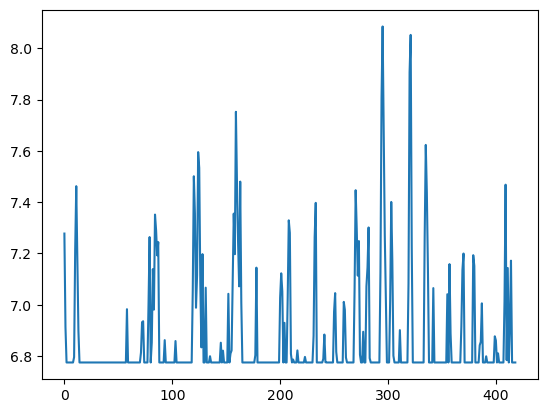

In [60]:
sub_gru.sleep_hours.plot()

### LSTM

In [32]:
import json

with open("lstm_best_params.json", "r") as f:
    lstm_best_params = json.load(f)
    
print("Best Parameters for LSTM: ", lstm_best_params)

Best Parameters for LSTM:  {'lookback': 13, 'criterion': 'huber', 'optimizer': 'adamw', 'batch_size': 51, 'num_epochs': 497, 'num_layers': 1, 'hidden_size': 55, 'dropout_rate': 0.5632208872024901, 'learning_rate': 0.0003492454573360324, 'activation_function': 'linear'}


In [33]:
from lstm import TimeSeriesDataset, LSTMModel, LSTMTrainer



In [34]:

# Feature Config
lookback= lstm_best_params["lookback"]
batch_size = lstm_best_params["batch_size"]

train_ds = TimeSeriesDataset(train, lookback, output_size)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=False)

In [35]:
# Model Config
hidden_size= lstm_best_params["hidden_size"]
num_layers= lstm_best_params["num_layers"]
learning_rate = lstm_best_params["learning_rate"]
dropout_rate = lstm_best_params["dropout_rate"]
activation_function = lstm_best_params["activation_function"]

lstm = LSTMModel(device, input_size, hidden_size, num_layers, output_size, dropout_rate, activation_function).to(device)

In [36]:
# Training Config
criterion = lstm_best_params["criterion"]
optimizer = lstm_best_params["optimizer"]
num_epochs = 500 #lstm_best_params["num_epochs"]

#target_scaler # Inverse scaling is used to calculate validation RMSE

lstm_trainer = LSTMTrainer(lstm, device, learning_rate, criterion, optimizer, target_scaler)

In [37]:
for epoch in range(num_epochs):
    train_loss = lstm_trainer.train(train_dl)
    val_loss = lstm_trainer.evaluate(train_dl)
    print(f"Epoch {epoch+1}/{num_epochs}, train_{criterion}: {train_loss:.4f}, valid_rmse: {val_loss:.4f}")

Epoch 1/500, train_huber: 0.5923, valid_rmse: 1.1052
Epoch 2/500, train_huber: 0.5652, valid_rmse: 1.0425
Epoch 3/500, train_huber: 0.5175, valid_rmse: 0.9972
Epoch 4/500, train_huber: 0.4219, valid_rmse: 0.9557
Epoch 5/500, train_huber: 0.4297, valid_rmse: 0.9202
Epoch 6/500, train_huber: 0.4138, valid_rmse: 0.8898
Epoch 7/500, train_huber: 0.4322, valid_rmse: 0.8639
Epoch 8/500, train_huber: 0.3845, valid_rmse: 0.8386
Epoch 9/500, train_huber: 0.4047, valid_rmse: 0.8176
Epoch 10/500, train_huber: 0.3349, valid_rmse: 0.8003
Epoch 11/500, train_huber: 0.3223, valid_rmse: 0.7860
Epoch 12/500, train_huber: 0.3498, valid_rmse: 0.7688
Epoch 13/500, train_huber: 0.3345, valid_rmse: 0.7517
Epoch 14/500, train_huber: 0.3013, valid_rmse: 0.7367
Epoch 15/500, train_huber: 0.2962, valid_rmse: 0.7237
Epoch 16/500, train_huber: 0.2768, valid_rmse: 0.7100
Epoch 17/500, train_huber: 0.2954, valid_rmse: 0.6993
Epoch 18/500, train_huber: 0.2992, valid_rmse: 0.6907
Epoch 19/500, train_huber: 0.2913, va

In [38]:
sub_lstm = data.create_submission(NN_Output(lstm_trainer, lookback, target_scaler, scaler_f, imputer), preprocess=False)
sub_lstm.to_csv("./submissions/sub_lstm.csv", index=False)
sub_lstm.head()

INFO - Creating submission dataset
INFO - Featurizing time series data
INFO - Creating interactions...


Index(['date', 'sleep_hours', 'is_workday', 'AppleStandTime_max_hrs_between',
       'AppleStandTime_max_endDate_hr', 'FlightsClimbed_max_endDate_hr',
       'AppleExerciseTime_max_hrs_between', 'min_endDate_max_hr',
       'AppleStandTime_nhours_max_max', 'FlightsClimbed_min_endDate_hr',
       ...
       'WalkingStepLength_min_startDate_hr',
       'OxygenSaturation_min_startDate_hr', 'max_endDate_min_hr',
       'WalkingStepLength_max_startDate_hr', 'workout_totalEnergyBurnedUnit',
       'AppleStandHour_nhours_max_min', 'AppleStandHour_nhours_max_max',
       'workout_totalEnergyBurned', 'is_weekend',
       'AppleStandHour_min_endDate_hr'],
      dtype='object', length=163)


,date,sleep_hours
0,2022-01-01,6.774867
1,2022-01-02,6.793153
2,2022-01-03,7.324298
3,2022-01-04,7.223482
4,2022-01-05,5.911416


<Axes: >

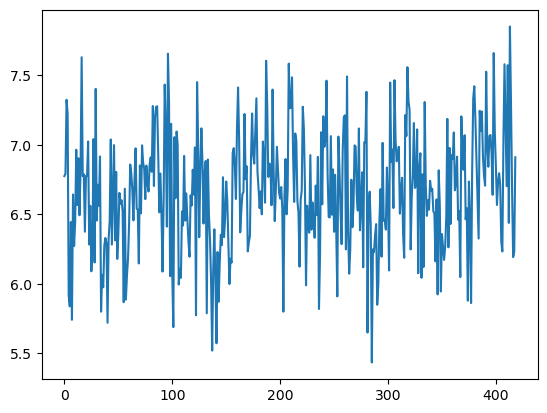

In [58]:
sub_lstm.sleep_hours.plot()

### XGBoost (for Bojan)

In [39]:
# Add Lags and Re-Split/Preprocess
# data.create_lags() #! Need to figure out lags for submissions - iterate through predictions?
# data.train_test_split()
# data.preprocess_data()

In [40]:
data.X.head()

,is_workday,AppleStandTime_max_hrs_between,AppleStandTime_max_endDate_hr,FlightsClimbed_max_endDate_hr,AppleExerciseTime_max_hrs_between,min_endDate_max_hr,AppleStandTime_nhours_max_max,FlightsClimbed_min_endDate_hr,StairDescentSpeed_min_endDate_hr,appleStandHours,...,WalkingStepLength_min_startDate_hr,OxygenSaturation_min_startDate_hr,max_endDate_min_hr,WalkingStepLength_max_startDate_hr,workout_totalEnergyBurnedUnit,AppleStandHour_nhours_max_min,AppleStandHour_nhours_max_max,workout_totalEnergyBurned,is_weekend,AppleStandHour_min_endDate_hr
0,1,NaN,NaN,23.0,NaN,23.0,NaN,23.0,NaN,NaN,...,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,0,NaN
1,1,NaN,NaN,23.0,NaN,23.0,NaN,22.0,NaN,NaN,...,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,0,NaN
2,1,NaN,NaN,23.0,NaN,23.0,NaN,23.0,NaN,NaN,...,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,0,NaN
3,1,NaN,NaN,23.0,NaN,23.0,NaN,23.0,NaN,NaN,...,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,0,NaN
4,1,NaN,NaN,23.0,NaN,23.0,NaN,23.0,NaN,NaN,...,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,0,NaN


In [41]:
import json

with open("xgb_best_params.json", "r") as f:
    xgb_best_params = json.load(f)
    
print("Best Parameters for XGBoost: ", xgb_best_params)

Best Parameters for XGBoost:  {'eta': 0.2096088876181359, 'alpha': 4.04070830162846, 'lmbda': 9.270745540100616, 'scaler': 'robust', 'imputer': 'median', 'max_depth': 2, 'subsample': 0.27760800448566814, 'n_estimators': 1887, 'learning_rate': 0.0346492845111299, 'colsample_bytree': 0.30987836753571074}


In [42]:
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

xgb_params = {
    "learning_rate": xgb_best_params["learning_rate"],
    "max_depth": xgb_best_params["max_depth"],
    'lambda': xgb_best_params["lmbda"],
    'alpha': xgb_best_params["alpha"],
    "n_estimators": xgb_best_params["n_estimators"],
    "subsample": xgb_best_params["subsample"],
    "colsample_bytree": xgb_best_params["colsample_bytree"],
    'eta': xgb_best_params["eta"],
    "objective": "reg:squarederror",
    "seed": 42
}

model = XGBRegressor(**xgb_params, 
                            gpu_id=0, 
                            tree_method="gpu_hist",
                            random_state=42
                            )

# Scaler
if xgb_best_params["scaler"] == "minmax":
    scaler = MinMaxScaler()
elif xgb_best_params["scaler"] == "standard":
    scaler = StandardScaler()
elif xgb_best_params["scaler"] == "robust":
    scaler = RobustScaler()
elif xgb_best_params["scaler"] == "none":
    scaler = None

# Imputer 
if xgb_best_params["imputer"] == "mean":
    imputer = SimpleImputer(strategy="mean")
elif xgb_best_params["imputer"] == "median":
    imputer = SimpleImputer(strategy="median")
elif xgb_best_params["imputer"] == "most_frequent":
    imputer = SimpleImputer(strategy="most_frequent")
elif xgb_best_params["imputer"] == "none":
    imputer = None 

pipeline_xgb = Pipeline(steps=[("imputer", imputer), ("scaler", scaler), ("model", model)])

pipeline_xgb.fit(data.X, data.y)


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', RobustScaler()),
                ('model',
                 XGBRegressor(alpha=4.04070830162846, base_score=None,
                              booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.30987836753571074,
                              early_stopping_rounds=None,
                              enable_categorical=False, eta=0.2096088876181359,
                              eval_metric=None,..., gamma=None,
                              gpu_id=0, grow_policy=None, importance_type=None,
                              interaction_constraints=None,
                              lambda=9.270745540100616,
                              learning_rate=0.0346492845111299, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=2, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=1887,
                              n_jobs=None, ...))])

In [43]:
sub_xgb = data.create_submission(pipeline_xgb)
sub_xgb.to_csv("./submissions/sub_xgb.csv", index=False)
sub_xgb.head()

INFO - Creating submission dataset
INFO - Featurizing time series data
INFO - Creating interactions...


Index(['date', 'sleep_hours', 'is_workday', 'AppleStandTime_max_hrs_between',
       'AppleStandTime_max_endDate_hr', 'FlightsClimbed_max_endDate_hr',
       'AppleExerciseTime_max_hrs_between', 'min_endDate_max_hr',
       'AppleStandTime_nhours_max_max', 'FlightsClimbed_min_endDate_hr',
       ...
       'WalkingStepLength_min_startDate_hr',
       'OxygenSaturation_min_startDate_hr', 'max_endDate_min_hr',
       'WalkingStepLength_max_startDate_hr', 'workout_totalEnergyBurnedUnit',
       'AppleStandHour_nhours_max_min', 'AppleStandHour_nhours_max_max',
       'workout_totalEnergyBurned', 'is_weekend',
       'AppleStandHour_min_endDate_hr'],
      dtype='object', length=163)


,date,sleep_hours
0,2022-01-01,6.400317
1,2022-01-02,6.329350
2,2022-01-03,6.432648
3,2022-01-04,6.462799
4,2022-01-05,6.032097


<Axes: >

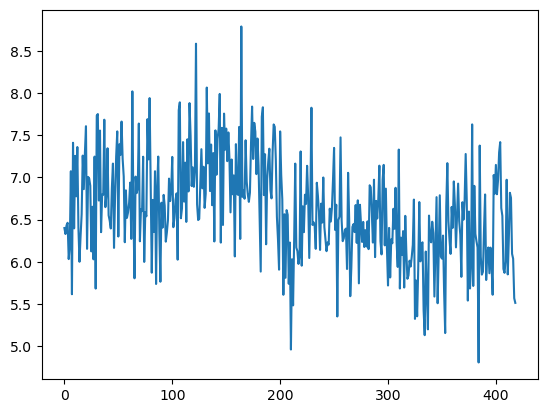

In [78]:
sub_xgb.sleep_hours.plot()

### XGB Classifier Version

In [44]:
with open("xgb_classifier_best_params.json", "r") as f:
    xgb_classifier_best_params = json.load(f)
    
print("Best Parameters for XGBoost: ", xgb_classifier_best_params)

Best Parameters for XGBoost:  {'eta': 0.28141251589565613, 'alpha': 2.9271835616058315, 'lmbda': 5.084678272561143, 'scaler': 'robust', 'imputer': 'most_frequent', 'max_depth': 12, 'subsample': 0.4166151092031941, 'n_estimators': 1521, 'learning_rate': 0.04383574489925266, 'colsample_bytree': 0.5651895087092169}


In [45]:
from xgboost import XGBClassifier

xgb_clf_params = {
    "learning_rate": xgb_classifier_best_params["learning_rate"],
    "max_depth": xgb_classifier_best_params["max_depth"],
    'lambda': xgb_classifier_best_params["lmbda"],
    'alpha': xgb_classifier_best_params["alpha"],
    "n_estimators": xgb_classifier_best_params["n_estimators"],
    "subsample": xgb_classifier_best_params["subsample"],
    "colsample_bytree": xgb_classifier_best_params["colsample_bytree"],
    'eta': xgb_classifier_best_params["eta"],
    "objective": "reg:squarederror",
    "seed": 42
}

model = XGBClassifier(**xgb_clf_params, 
                            gpu_id=0, 
                            tree_method="gpu_hist",
                            random_state=42
                            )

# Scaler
if xgb_classifier_best_params["scaler"] == "minmax":
    scaler = MinMaxScaler()
elif xgb_classifier_best_params["scaler"] == "standard":
    scaler = StandardScaler()
elif xgb_classifier_best_params["scaler"] == "robust":
    scaler = RobustScaler()
elif xgb_classifier_best_params["scaler"] == "none":
    scaler = None

# Imputer 
if xgb_classifier_best_params["imputer"] == "mean":
    imputer = SimpleImputer(strategy="mean")
elif xgb_classifier_best_params["imputer"] == "median":
    imputer = SimpleImputer(strategy="median")
elif xgb_classifier_best_params["imputer"] == "most_frequent":
    imputer = SimpleImputer(strategy="most_frequent")
elif xgb_classifier_best_params["imputer"] == "none":
    imputer = None 

pipeline_xgb_clf = Pipeline(steps=[("imputer", imputer), ("scaler", scaler), ("model", model)])

y = data.y > data.y.median()

pipeline_xgb_clf.fit(data.X, y)

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('scaler', RobustScaler()),
                ('model',
                 XGBClassifier(alpha=2.9271835616058315, base_score=None,
                               booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.5651895087092169,
                               early_stopping_rounds=None,
                               enable_categorical=False,
                               eta=0.28141251589565613, eval_me...
                               feature_types=None, gamma=None, gpu_id=0,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               lambda=5.084678272561143,
                               learning_rate=0.04383574489925266, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=12,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=1521, n_jobs=None, ...))])

In [76]:
class XGBClassifierOutput:
    def __init__(self, model):
        self.model = model
        
    def predict(self, X):
        return self.model.predict_proba(X)[:, 1]

sub_xgb_clf = data.create_submission(XGBClassifierOutput(pipeline_xgb_clf))
# Define the values for the conditions
std = data.y.std()

med = data.y.median()
low = med - 1*std
high = med + 1*std

sub_xgb_clf['sleep_hours'] = sub_xgb_clf['sleep_hours'].apply(lambda x: (x*high)+(1-x)*low)   #.apply(lambda x: high if x > 0.75 else (low if x < 0.25 else med))

sub_xgb_clf.to_csv("./submissions/sub_xgb_clf.csv", index=False)
sub_xgb_clf.head()

INFO - Creating submission dataset
INFO - Featurizing time series data
INFO - Creating interactions...


Index(['date', 'sleep_hours', 'is_workday', 'AppleStandTime_max_hrs_between',
       'AppleStandTime_max_endDate_hr', 'FlightsClimbed_max_endDate_hr',
       'AppleExerciseTime_max_hrs_between', 'min_endDate_max_hr',
       'AppleStandTime_nhours_max_max', 'FlightsClimbed_min_endDate_hr',
       ...
       'WalkingStepLength_min_startDate_hr',
       'OxygenSaturation_min_startDate_hr', 'max_endDate_min_hr',
       'WalkingStepLength_max_startDate_hr', 'workout_totalEnergyBurnedUnit',
       'AppleStandHour_nhours_max_min', 'AppleStandHour_nhours_max_max',
       'workout_totalEnergyBurned', 'is_weekend',
       'AppleStandHour_min_endDate_hr'],
      dtype='object', length=163)


,date,sleep_hours
0,2022-01-01,6.461821
1,2022-01-02,6.518129
2,2022-01-03,5.863771
3,2022-01-04,6.143153
4,2022-01-05,6.151583


<Axes: >

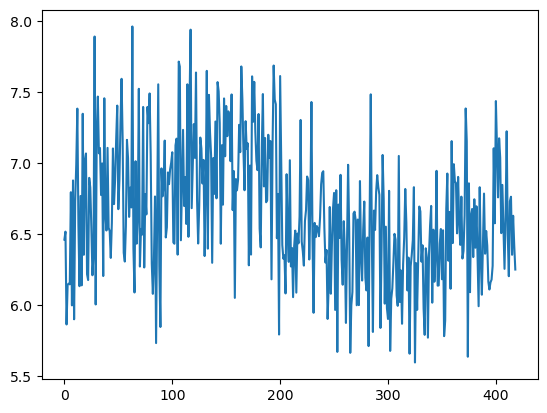

In [77]:
sub_xgb_clf.sleep_hours.plot()

### Extra Trees

In [79]:
with open("et_best_params.json", "r") as f:
    et_best_params = json.load(f)
    
print("Best Parameters for ExtraTrees: ", et_best_params)

Best Parameters for ExtraTrees:  {'scaler': 'robust', 'imputer': 'most_frequent', 'bootstrap': True, 'max_depth': 15, 'n_estimators': 632, 'min_samples_leaf': 10, 'min_samples_split': 10}


In [80]:
from sklearn.ensemble import ExtraTreesRegressor

et_params = {
    "n_estimators": et_best_params["n_estimators"],
    "max_depth": et_best_params["max_depth"],
    "min_samples_split": et_best_params["min_samples_split"],
    "min_samples_leaf": et_best_params["min_samples_leaf"],
    "bootstrap": et_best_params["bootstrap"],
}

model = ExtraTreesRegressor(**et_params, random_state=42)

# Scaler
if et_best_params["scaler"] == "minmax":
    scaler = MinMaxScaler()
elif et_best_params["scaler"] == "standard":
    scaler = StandardScaler()
elif et_best_params["scaler"] == "robust":
    scaler = RobustScaler()
elif et_best_params["scaler"] == "none":
    scaler = None

# Imputer 
if et_best_params["imputer"] == "mean":
    imputer = SimpleImputer(strategy="mean")
elif et_best_params["imputer"] == "median":
    imputer = SimpleImputer(strategy="median")
elif et_best_params["imputer"] == "most_frequent":
    imputer = SimpleImputer(strategy="most_frequent")
elif et_best_params["imputer"] == "none":
    imputer = None 

pipeline_et = Pipeline(steps=[("imputer", imputer), ("scaler", scaler), ("model", model)])

pipeline_et.fit(data.X, data.y)


Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('scaler', RobustScaler()),
                ('model',
                 ExtraTreesRegressor(bootstrap=True, max_depth=15,
                                     min_samples_leaf=10, min_samples_split=10,
                                     n_estimators=632, random_state=42))])

In [81]:
sub_et = data.create_submission(pipeline_et)
sub_et.to_csv("./submissions/sub_et.csv", index=False)
sub_et.head()

INFO - Creating submission dataset
INFO - Featurizing time series data
INFO - Creating interactions...


Index(['date', 'sleep_hours', 'is_workday', 'AppleStandTime_max_hrs_between',
       'AppleStandTime_max_endDate_hr', 'FlightsClimbed_max_endDate_hr',
       'AppleExerciseTime_max_hrs_between', 'min_endDate_max_hr',
       'AppleStandTime_nhours_max_max', 'FlightsClimbed_min_endDate_hr',
       ...
       'WalkingStepLength_min_startDate_hr',
       'OxygenSaturation_min_startDate_hr', 'max_endDate_min_hr',
       'WalkingStepLength_max_startDate_hr', 'workout_totalEnergyBurnedUnit',
       'AppleStandHour_nhours_max_min', 'AppleStandHour_nhours_max_max',
       'workout_totalEnergyBurned', 'is_weekend',
       'AppleStandHour_min_endDate_hr'],
      dtype='object', length=163)


,date,sleep_hours
0,2022-01-01,6.313630
1,2022-01-02,6.597152
2,2022-01-03,6.318694
3,2022-01-04,6.787258
4,2022-01-05,6.113853


<Axes: >

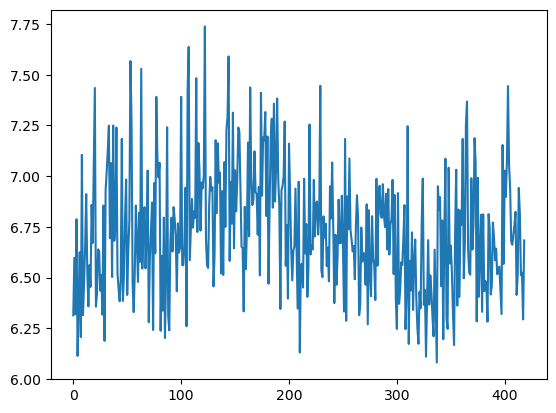

In [82]:
sub_et.sleep_hours.plot()

## Sleep Classifier Models

In [50]:
from multi_model import main

sub_hr_multi = main()
#change datatype of sleep_hours
sub_hr_multi['sleep_hours'] = sub_hr_multi['sleep_hours'].astype('float32')
#change date to str
sub_hr_multi['date'] = pd.to_datetime(sub_hr_multi['date']).dt.date

sub_hr_multi = sub_hr_multi.drop(columns=['source'], errors='ignore')
sub_hr_multi.to_csv("./submissions/sub_hr_multi.csv", index=False)

sub_hr_multi.head()

mean sleep hours:  6.576709600019948
         date  sleep_hours
0  2022-01-01     7.383768
1  2022-01-02     7.286788
2  2022-01-03     6.834159
3  2022-01-04     7.677216
4  2022-01-05     5.281331
5  2022-01-06     6.686404
6  2022-01-07     7.900198
7  2022-01-08     5.154730
8  2022-01-19     7.648513
9  2022-01-20     5.171434


,date,sleep_hours
0,2022-01-01,7.383768
1,2022-01-02,7.286788
2,2022-01-03,6.834159
3,2022-01-04,7.677216
4,2022-01-05,5.281331


<Axes: >

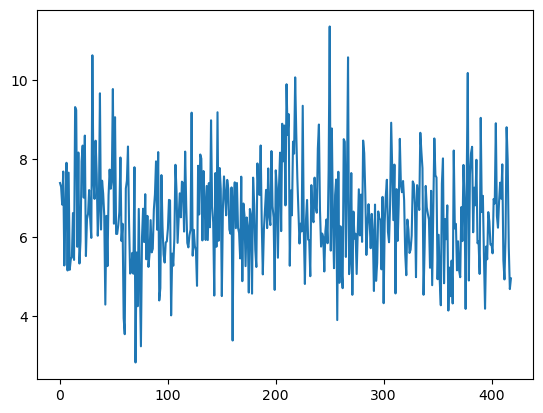

In [61]:
sub_hr_multi.sleep_hours.plot()

In [51]:
# from model_from_paper import main_large

# sub_large = main_large()
# #change datatype of sleep_hours
# sub_large['sleep_hours'] = sub_large['sleep_hours'].astype('float32')
# #change date to str
# sub_large['date'] = pd.to_datetime(sub_large['date']).dt.date

# sub_large = sub_large.drop(columns=['source'], errors='ignore')
# sub_large.to_csv("./submissions/sub_large.csv", index=False)

# sub_large.head()

# Stacks on Stacks

In [88]:
# Average all submissions
def average_prediction(dfs):
    for idx, df in enumerate(dfs):
        df["source"] = idx

    dfs = pd.concat(dfs)
    avg_df = dfs.groupby("date")["sleep_hours"].mean().reset_index()
    return avg_df
                                       
simple_weight = 0.25
complex_weight = 1.0 - simple_weight

sub_dfs_simple = [sub_mean_day_of_year, sub_median, sub_median_dow, sub_median_workday,  sub_median_dow_workday] #sub_mean, sub_mean_dow, sub_mean_workday, sub_mean_dow_workday
sub_dfs_complex = [sub_xgb, sub_xgb_clf, sub_lstm, sub_et, sub_prophet] # sub_large, sub_gru

# Calculate the average prediction for each list of DataFrames
avg_simple = average_prediction(sub_dfs_simple)
avg_simple.to_csv("./submissions/submission_avg_simple.csv", index=False)

avg_complex = average_prediction(sub_dfs_complex)
avg_complex.to_csv("./submissions/submission_avg_complex.csv", index=False)

stacks_on_stacks = avg_simple.merge(avg_complex, on="date", suffixes=("_simple", "_complex"))

# Calculate the weighted average
stacks_on_stacks["sleep_hours"] = simple_weight * stacks_on_stacks["sleep_hours_simple"] + complex_weight * stacks_on_stacks["sleep_hours_complex"]
stacks_on_stacks = stacks_on_stacks[["date", "sleep_hours"]]
stacks_on_stacks.head()

,date,sleep_hours
0,2022-01-01,6.570055
1,2022-01-02,6.543889
2,2022-01-03,6.512718
3,2022-01-04,6.602117
4,2022-01-05,6.275375


<Axes: >

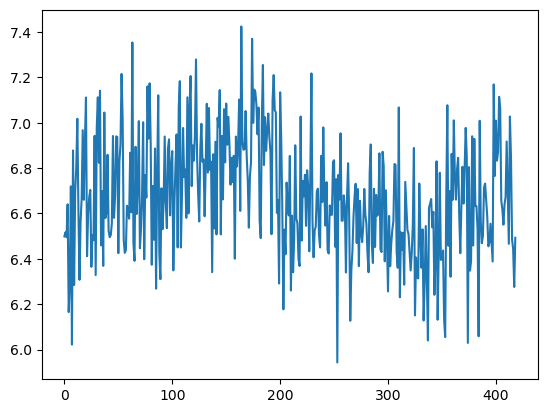

In [89]:
avg_complex.sleep_hours.plot()

<Axes: >

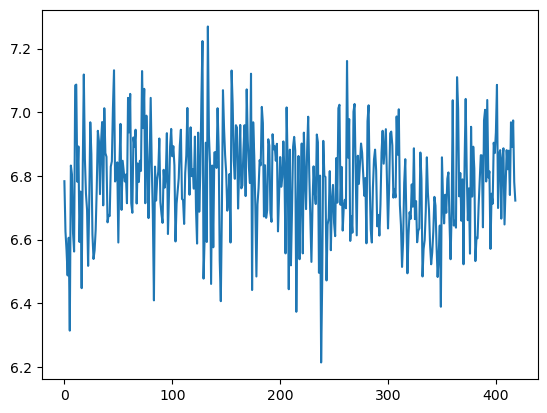

In [90]:
avg_simple.sleep_hours.plot()

<Axes: >

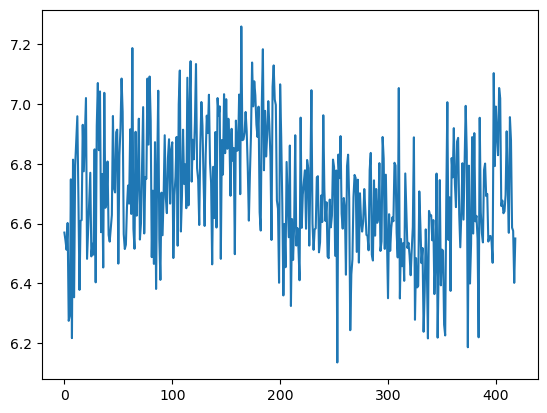

In [91]:
stacks_on_stacks.sleep_hours.plot()

In [87]:
stacks_on_stacks.to_csv("submission_combined.csv", index=False)
#kaggle competitions submit -c kaggle-pog-series-s01e04 -f submission_combined.csv -m "Model Stacking v3"